<a href="https://colab.research.google.com/github/BryanYuen0205/COMP4211_Kaggle_Comp/blob/main/COMP4211KaggleComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# Setting up environment
# Uncomment later
# !python --version
# !pip show torch tensorflow scikit-learn
# !pip install --upgrade "tensorflow>=2.18"
# !pip install "scikit-learn>=1.4.1"
# !pip install kaggle


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# To upload kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yuenbryanqiwen","key":"c2321ff86f79898992b270a75af32a13"}'}

In [114]:
# Creating a kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [115]:
# Downloading the kaggle competition dataset
!kaggle competitions download -c comp-4211-spring-25-project

comp-4211-spring-25-project.zip: Skipping, found more recently modified local copy (use --force to force download)


In [116]:
!unzip -q comp-4211-spring-25-project.zip -d ./data

replace ./data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [117]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
# View first few rows
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())


Train Data:


,id,Sentence,NER Tag
0,0,"['Thousands', 'of', 'demonstrators', 'have', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,1,"['Iranian', 'officials', 'say', 'they', 'expec...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."


Test Data:


,id,Sentence
0,0,"['Pakistani', 'officials', 'say', 'unidentifie..."
1,1,"['China', ""'s"", 'official', 'Xinhua', 'news', ..."
2,2,"['News', 'reports', 'say', 'since', '1998', ',..."
3,3,"['French', 'tennis', 'great', 'Mary', 'Pierce'..."
4,4,"['Now', 'ranked', '29th', 'in', 'the', 'world'..."


# Understanding the dataset
---



In [118]:
import ast

# Convert string representations of lists to actual lists
train_df["NER Tag"] = train_df["NER Tag"].apply(ast.literal_eval)
train_df["Sentence"] = train_df["Sentence"].apply(ast.literal_eval)

In [119]:
# Checking if dataset contains any null values
print(train_df.isnull().sum())

# Getting some basic statistics about the dataset
print(f"Total examples: {len(train_df)}")

# Checking if all sentences and tags have matching lengths
assert all(len(s) == len(t) for s,t in zip(train_df["NER Tag"], train_df["Sentence"]))

id          0
Sentence    0
NER Tag     0
dtype: int64
Total examples: 40000


In [120]:
# Count the number of tag frequencies
from collections import Counter

# Display the unique NER Tags
all_tags = [tag for sublist in train_df["NER Tag"] for tag in sublist]
unique_tags = sorted(set(all_tags))
print("Unique NER Tags:", unique_tags)

# Get the frequencies of each tag
tag_counts = Counter(all_tags)
frequency_dict = dict(tag_counts)
print("All Tag Frequencies:", frequency_dict)

# Display the unique words
all_words = [word for sublist in train_df["Sentence"] for word in sublist]
unique_words = sorted(set(all_words))
print("Unique Words:", unique_words)

Unique NER Tags: ['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org', 'I-per', 'I-tim', 'O']
All Tag Frequencies: {'O': 741576, 'B-geo': 31368, 'B-gpe': 13080, 'B-tim': 16982, 'B-org': 16825, 'I-geo': 6154, 'B-per': 14204, 'I-per': 14456, 'I-org': 14138, 'I-tim': 5510, 'B-art': 333, 'I-art': 257, 'B-nat': 170, 'I-gpe': 160, 'I-nat': 35, 'B-eve': 250, 'I-eve': 211}
Unique Words: ['!', '"', '#', '#NAME?', '$', '%', '%-plus', '&', "'", "'70s", "'80s", "'T", "'d", "'ll", "'m", "'re", "'s", "'ve", '(', ')', ',', '-', '--', '.', '..', '...', '.tv', '/', '0-3', '0-6', '0.01', '0.04', '0.050474537', '0.051655093', '0.060092593', '0.068171296', '0.068217593', '0.068263889', '0.068275463', '0.068472222', '0.08', '0.1', '0.110474537', '0.110625', '0.12', '0.161', '0.17', '0.19', '0.193', '0.2', '0.3', '0.35', '0.4', '0.5', '0.6', '0.65', '0.7', '0.8', '0.82', '0.9', '01-Feb', '01-Jan', '01-Jun', '02-Feb', '02-Jan', '02-Jun'

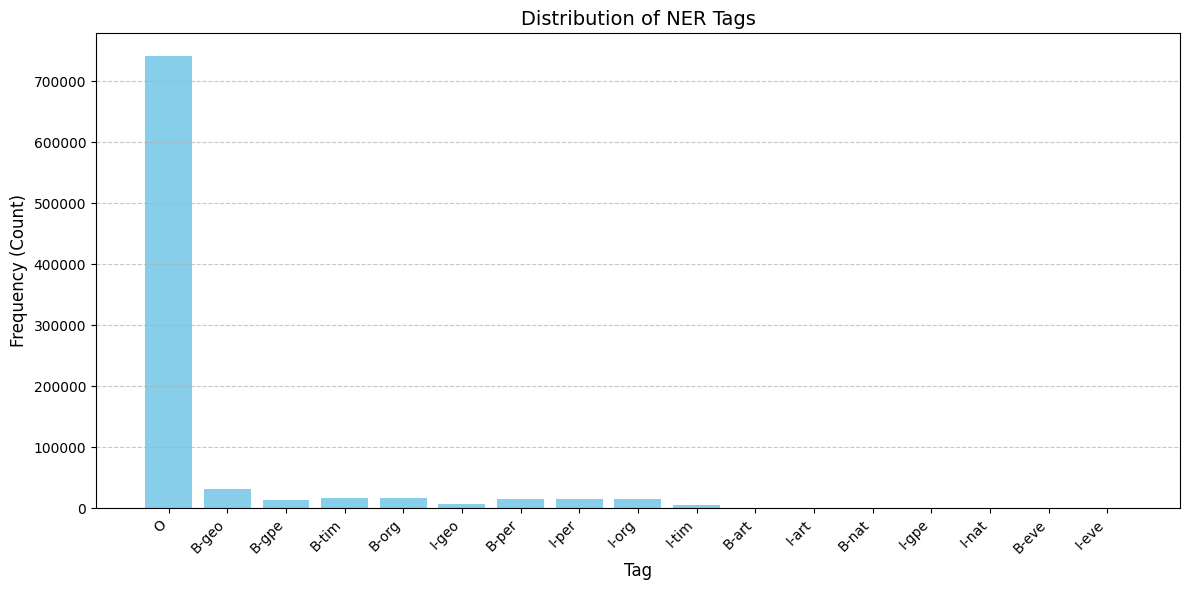

In [121]:
import matplotlib.pyplot as plt

tags = frequency_dict.keys()
tag_freq = frequency_dict.values()

plt.figure(figsize=(12, 6))
plt.bar(tags, tag_freq, color='skyblue')

# Customize the plot
plt.title('Distribution of NER Tags', fontsize=14)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Prevents label cutoff
plt.show()

In [122]:
# Create tag-to-index mapping and index-to-tag mapping for tags
tag2idx = {tag:index for index, tag in enumerate(unique_tags)}
idx2tag = {index:tag for index, tag in enumerate(unique_tags)}

# Create word-to-index mapping for words in the dataset
word2idx = {word:index+1 for index, word in enumerate(unique_words)}
# <PAD> is used to represent padding
word2idx['<PAD>'] = 0
# <UNK> is used to represent unknown words
word2idx['<UNK>'] = len(word2idx)

In [123]:
import numpy as np

# Function to convert words into numerical indices using word2idx and tags into numerical indices using tag2idx
# Outputs:
# X_word: A 2D NumPy array where each row represents a sentence with word indices.
# y: A 2D NumPy array where each row represents the corresponding tag indices for the sentence.

def prepare_sentence(samples, word2idx, tag2idx):
    # Obtain the length of the longest sentence
    max_len = max(len(s) for s in samples['Sentence'])

    X_word = np.zeros((len(samples), max_len), dtype=np.int32)
    y = np.zeros((len(samples), max_len), dtype=np.int32)

    for i, (sentence, tags) in enumerate(zip(samples['Sentence'], samples['NER Tag'])):
        for j, word in enumerate(sentence):
            X_word[i, j] = word2idx.get(word, word2idx['<UNK>'])
            y[i, j] = tag2idx[tags[j]]

    return X_word, y


# Testing the function
# X_word, y = prepare_sentence(train_df[:2], word2idx=word2idx, tag2idx=tag2idx)
# print("Word-Level Encodings:\n", X_word)
# print("Tag-Level Encodings:\n", y)

